# NAMED WIDGETS

Create GUI with magicgui

Extended intial FunctionalGui with named widgets

However can only add widgets for 1 pair of images

After that FunctionalGUI stops responding

FunctionalGui starts responding again if extended set of widgets deleted (click on PushButton)

In [1]:
from typing import  List

from magicgui.widgets import PushButton, FloatSlider, ComboBox, Label
from magicgui import magicgui
from skimage import data
import napari


@magicgui(
    auto_call = True,
    new_sink_btn = {"widget_type": "PushButton", 'label':'new pair'},
    images = {'visible':False}
)
def napari_plugin(
    new_sink_btn,
    images: napari.layers.Image,
) -> List[napari.types.LayerDataTuple]:

    mixing_data = napari_plugin.asdict()
    pairs = [p.split(' ')[-1] for p in list(mixing_data) if 'alpha' in p]
    print('Index of image pairs:', *pairs)
    
    unmixed = []
    for p in pairs:
        source = mixing_data['source_'+p]
        sink = mixing_data['sink_'+p]
        alpha = mixing_data['alpha_'+p]
    
        if source is not None and sink is not None:
            sink_ = sink.data - alpha*source.data
            unmixed.append((sink_, {'name':'pair '+p}, 'image'))
            
    if len(unmixed) > 0:
        return unmixed


# # # set up callbacks
@napari_plugin.new_pair_button.clicked.connect
def new_pair():
    
    # Get unique index for image pairs
    widget_names = list(napari_plugin.asdict())
    print('Widgets in FunctionalGui::before extension::', *widget_names)
    index = (len(widget_names)-2)//4
    while 'delete_'+str(index) in widget_names:
        index += 1
    index = str(index)
    print('Index for new set of widgets', index)
    
    im_choices = (None,) + napari_plugin.images.choices
          
    # define widgets with names
    label = Label(label = 'pair '+index, name='pair_'+index)
    delete_button = PushButton(label='delete', name='delete_'+index) 
    source = ComboBox(choices=im_choices, label='source', name='source_'+index)
    sink = ComboBox(choices=im_choices, label='sink', name='sink_'+index)
    alpha = FloatSlider(max=2.0, label='alpha', value = 0.0, name='alpha_'+index)
    

    
    # delete button callback
    @delete_button.changed.connect
    def delete_pair():
        index = delete_button.name.split('_')[-1]
        for w in ['pair', 'delete','source', 'sink', 'alpha']:
            napari_plugin.remove(w+'_'+index)
    
    #Add widgets
    new_pair = [label, delete_button, source, sink, alpha]
    #new_pair =  [label, source, sink, alpha]
    napari_plugin.extend(new_pair)
    
    widget_names = list(napari_plugin.asdict())
    print('Widgets in FunctionalGui::after extension::', *widget_names)
    


rgb_im = data.astronaut()
viewer = napari.Viewer()
viewer.add_image(rgb_im[:,:,0].squeeze(), name= 'red', blending='additive', colormap='red')
viewer.add_image(rgb_im[:,:,1].squeeze(), name= 'green', blending='additive', colormap='green')
viewer.add_image(rgb_im[:,:,2].squeeze(), name= 'blue', blending='additive', colormap='blue')
widget = viewer.window.add_dock_widget(napari_plugin, name='PICASSO')

Index of image pairs:
Index of image pairs:
Widgets in FunctionalGui::before extension:: new_pair_button images
Index for new set of widgets 0
Widgets in FunctionalGui::after extension:: new_pair_button images pair_0 delete_0 source_0 sink_0 alpha_0
Index of image pairs:
Index of image pairs:
Widgets in FunctionalGui::before extension:: new_pair_button images
Index for new set of widgets 0
Widgets in FunctionalGui::after extension:: new_pair_button images pair_0 delete_0 source_0 sink_0 alpha_0
Index of image pairs:
Index of image pairs:
Widgets in FunctionalGui::before extension:: new_pair_button images
Index for new set of widgets 0
Widgets in FunctionalGui::after extension:: new_pair_button images pair_0 delete_0 source_0 sink_0 alpha_0
Index of image pairs:


# UNNAMED WIDGETS

Create GUI with magicgui

Extended intial FunctionalGui with unnamed widgets

How ever can multiple sets widgets for multiple pairs of images

But how do I access the widgets? Which which widgets correspond to which image pairs?

Delete pushbutton does not work.

In [2]:
from typing import  List

from magicgui.widgets import PushButton, FloatSlider, ComboBox, Label
from magicgui import magicgui
from skimage import data
import napari


@magicgui(
    auto_call = True,
    new_sink_button = {"widget_type": "PushButton", 'label':'new sink'},
    images = {'visible':False}
)
def napari_plugin(
    new_sink_button,
    images: napari.layers.Image,
) -> List[napari.types.LayerDataTuple]:

    ## HOW DO I ACCESS WIDGETS WITHOUT NAMES ???
    mixing_data = napari_plugin.asdict()
    pairs = [p.split(' ')[-1] for p in list(mixing_data) if 'alpha' in p]
    print('Index of image pairs:', *pairs)
    
    ## HOW DO I KNOW WHICH WIDGET CORRESPONGS TO IMAGE PAIR WITHOUT NAMES ???
    unmixed = []
    for p in pairs:
        source = mixing_data['source_'+p]
        sink = mixing_data['sink_'+p]
        alpha = mixing_data['alpha_'+p]
    
        if source is not None and sink is not None:
            sink_ = sink.data - alpha*source.data
            unmixed.append((sink_, {'name':'pair '+p}, 'image'))
            
    if len(unmixed) > 0:
        return unmixed


# # # set up callbacks
@napari_plugin.new_sink_button.clicked.connect
def new_sink():

    im_choices = (None,) + napari_plugin.images.choices
    
    # define widget without names
    delete_button = PushButton(label='delete') 
    #label = Label(label='sink n') 
    #source = ComboBox(choices=im_choices, label='source')
    sink = ComboBox(choices=im_choices, label='sink')
    #alpha = FloatSlider(max=2.0, label='alpha', value = 0.0)
    
    # HOW DO I DELETE  WIDGETS WITHOUT NAMES ???
    # delete button callback
#     @delete_button.changed.connect
#     def delete_pair():
#         index = delete_button.name.split('_')[-1]
#         for w in ['pair', 'delete','source', 'sink', 'alpha']:
#             napari_plugin.remove(w+'_'+index)
    
    #Add widgets
    #new_pair = [label, delete_button, source, sink, alpha]
    new_sink = [delete_button, sink]
    napari_plugin.extend(new_sink)
    
    widget_names = list(napari_plugin.asdict())
    print('Widgets in FunctionalGui::after extension::', *widget_names)
    


rgb_im = data.astronaut()
viewer = napari.Viewer()
viewer.add_image(rgb_im[:,:,0].squeeze(), name= 'red', blending='additive', colormap='red')
viewer.add_image(rgb_im[:,:,1].squeeze(), name= 'green', blending='additive', colormap='green')
viewer.add_image(rgb_im[:,:,2].squeeze(), name= 'blue', blending='additive', colormap='blue')
widget = viewer.window.add_dock_widget(napari_plugin, name='PICASSO')

Index of image pairs:
Index of image pairs:
Widgets in FunctionalGui::after extension:: new_sink_button images
Index of image pairs:
Widgets in FunctionalGui::after extension:: new_sink_button images
Index of image pairs:
Widgets in FunctionalGui::after extension:: new_sink_button images
Index of image pairs:
Widgets in FunctionalGui::after extension:: new_sink_button images
Index of image pairs:
Index of image pairs:
Index of image pairs:


Just exploring below

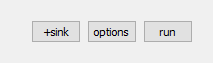

open picasso options
open picasso options
run picasso
run picasso
run picasso
open sink 0 options
open sink 0 options
open sink 1 options
open sink 1 options


In [45]:
from magicgui.widgets import PushButton, FloatSlider, Container, ComboBox
from napari.types import ImageData
from skimage import data
import napari

# class header(Container):
    
#     def __init__(self):
#         super().__init__(layout='horizontal', labels=False)
        
#         self.message = None
        
#         add_sink_btn = PushButton(text="+sink", name="add_sink")
#         add_sink_btn.changed.connect(self.add_sink)
        
#         open_options_btn = PushButton(text="options", name="options")
#         open_options_btn.changed.connect(self.open_options)
        
#         run_btn = PushButton(text="run", name="run")
#         run_btn.changed.connect(self.run_picasso)
        
#         _widgets = [add_sink_btn, open_options_btn, run_btn]
#         for w in _widgets:
#             w.max_width = 50
        
#         self.extend(_widgets)



#header.show()









header = Container(widgets = _widgets, layout='horizontal', labels=False, name='header')

class picasso_widget(Container):
    
    def __init__(self):
        
        super().__init__()
        
        # Header buttons
        add_sink_btn = PushButton(text="+sink", name="add_sink")
        open_options_btn = PushButton(text="options", name="options")
        run_btn = PushButton(text="run", name="run")
        
        # Connect header buttons to header functions
        add_sink_btn.changed.connect(self._add_sink_widget)
        open_options_btn.changed.connect(self.open_options)
        run_btn.changed.connect(self.run_picasso)        
        
        # Size header buttons
        widgets = [add_sink_btn, open_options_btn, run_btn]
        for w in widgets:
            w.max_width = 50  
            
        header = Container(widgets = widgets, layout='horizontal', labels=False)
        self.append(header)
        
        self.sinks = []
    
    def _add_sink_widget(self: Container):
        
        i = 0
        while i in self.sinks:
            i += 1
            
        self.sinks.append(i)
        self.append(sink_widget(i))
    
    
    def open_options(self: Container):
        print('open picasso options')

    def run_picasso(self: Container):
        print('run picasso')
            
        
    
      
test = picasso_widget()
test.show()
      

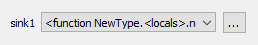

In [44]:
from magicgui.widgets import PushButton, FloatSlider, Container, ComboBox, Label
from napari.types import ImageData



class MixingParams():
    def __init__(self, source):
        self.source = source
        
        
        

    

class sink_widget(Container):
    
    def __init__(self, index):
        
        sink_list = ComboBox(choices=[ImageData], name = f'sinklist{index}', label=f'sink{index}')
        sink_list.max_width = 175
                             
        sink_options_btn = PushButton(name=f'sinkopts{index}', label = '...')
        sink_options_btn.max_width = 25
        sink_options_btn.changed.connect(self.sink_options) 
        
        self.sink_list = sink_list
                 
        super().__init__(widgets = (sink_list, sink_options_btn), 
                         layout='horizontal', 
                         name=f'sink{index}',
                         label = ' '
                        )
                             
        self.mixing_params = None
        self.index = index

    def sink_options(self):
        print(f'open sink {self.index} options')
        
class source_widget(Container):
    
    def __init__(self, index, **kwargs):
        
        source_label = Label(name=f'source{index}')
        
        source_list = ComboBox(choices=[ImageData], **kwargs)   
        sink_list.max_width = 175
        
        alpha_slider = FloatSlider(max=2.0, label='alpha', value = 0.0)
        alpha_slider.max_width = 175
        
        self.source = source_list
        self.alpha = alpha_slider
        
        super().__init__(widgets = (source_label, source_list, alpha_slide),  
                         name=f'source{index}',
                         label = ' '
                        )
        
        
    
        
class source_options(Container):
    def __init__(self, index, mixing_params):
        
        
        add_source_btn = PushButton(name=f'addsource', label = '+')
        sink_options_btn.max_width = 25
        
        
        super().__init__(widgets = (add_source_btn),  
                         name=f'sink{index}_sources',
                         label = ' '
                        )
        
        for i, sink_im in enumerate(mixing_params.keys())
            
            
        
        source_list = ComboBox(choices=[ImageData], name = f'sinklist{index}', label=f'sink{index}')
        sink_list.max_width = 175
        
        
    
test_sink = sink_widget(1)
test_sink.show()

In [ ]:
1+1

In [ ]:
test = {'name': 1}
for i, n, v in test.items():
    print(i, n, v)
test

In [32]:

from magicgui.widgets import PushButton, FloatSlider, Container, ComboBox

class picassoEdit(Container):
    

'source1'

In [159]:
from magicgui.widgets import PushButton, FloatSlider, Container, ComboBox
from napari.types import ImageData

# make some widgets
add_new_button = PushButton(name='add')

# set up callbacks
@add_new_button.changed.connect
def add_pair():
    container.extend([Container(widgets=[ComboBox(choices=[ImageData]),
                                         ComboBox(choices=[ImageData]),
                                         FloatSlider(max=2),
                                        ])])

# create a container to hold the widgets:
container = Container(name='BigContainer', widgets=[add_new_button])
rgb_im = data.astronaut()
viewer = napari.Viewer()
viewer.add_image(rgb_im[:,:,0].squeeze(), name= 'red')
viewer.add_image(rgb_im[:,:,1].squeeze(), name= 'green')
viewer.window.add_dock_widget(container)

In [1]:
#from magicgui.widgets._bases import ContainerWidget, Widget, ValueWidget
from magicgui.widgets import Container, PushButton
from magicgui.widgets._bases.value_widget import UNSET, _Unset
from typing import Iterable, TypeVar, Callable
from magicgui.types import WidgetOptions

_V = TypeVar("_V")

    
class picassoEdit(Container):
    """A widget to represent a dictionary of values.
    A DictionarytEdit container can create a dictionary with multiple objects of same type. It
    will contain many child widgets and their value is represented as a Python dictionary
    object. If a dictionary is given as the initial value, types of child widgets are
    determined from the contents. Number of contents can be adjusted with +/-
    buttons.
    Parameters
    ----------
    options: WidgetOptions, optional
        Widget options of child widgets.
    """

    def __init__(
        self,
        value: _Unset = UNSET,
        layout: str = "horizontal",
        nullable: bool = False,
        options: WidgetOptions = None,
        **kwargs,
    ):
        self._args_type: type | None = None
        self._nullable = nullable
        super().__init__(layout=layout, labels=False, **kwargs)
        self.margins = (0, 0, 0, 0)

        if not isinstance(value, _Unset):
            types = {type(a) for a in value}
            if len(types) == 1:
                if self._args_type is None:
                    self._args_type = types.pop()
            else:
                raise TypeError("values have inconsistent types.")
            _value: Iterable[_V] = value
        else:
            _value = []

        self._child_options = options or {}

        button_plus = PushButton(text="+", name="plus")
        button_plus.changed.connect(lambda: self._append_value())

        button_minus = PushButton(text="-", name="minus")
        button_minus.changed.connect(self._pop_value)

        if layout == "horizontal":
            button_plus.max_width = 40
            button_minus.max_width = 40

        self.append(button_plus)
        self.append(button_minus)

        for a in _value:
            self._append_value(a)

        self.btn_plus = button_plus
        self.btn_minus = button_minus

    @property
    def annotation(self):
        """Return type annotation for the parameter represented by the widget.
        ForwardRefs will be resolve when setting the annotation. For ListEdit,
        annotation will be like 'list[str]'.
        """
        return self._annotation

    @annotation.setter
    def annotation(self, value):
        if value is None:
            self._annotation = None
            self._args_type = None
            return

        from .._type_wrapper import resolve_annotation

        value = resolve_annotation(value)
        arg: type | None = None

        if value and value is not inspect.Parameter.empty:
            from magicgui.type_map import _is_subclass

            orig = get_origin(value)
            if not (_is_subclass(orig, list) or isinstance(orig, list)):
                raise TypeError(
                    f"cannot set annotation {value} to {type(self).__name__}."
                )
            args = get_args(value)
            if len(args) > 0:
                arg = args[0]
            else:
                arg = None

        self._annotation = value
        self._args_type = arg

    def _append_value(self, value=UNSET):
        """Create a new child value widget and append it."""
        i = len(self) - 2

        widget = create_widget(
            annotation=self._args_type,
            name=f"value_{i}",
            options=self._child_options,
        )

        if isinstance(widget, EmptyWidget):
            raise TypeError("could not determine the type of child widget.")

        self.insert(i, widget)

        # Value must be set after new widget is inserted because it could be
        # valid only after same parent is shared between widgets.
        if value is UNSET and i > 0:
            value = self[i - 1].value  # type: ignore
        if value is not UNSET:
            widget.value = value

    def _pop_value(self):
        """Delete last child value widget."""
        try:
            self.pop(-3)
        except IndexError:
            pass

#     @property
#     def value(self) -> list:
#         """Return current value as a list object."""
#         return list(ListDataView(self))

#     @value.setter
#     def value(self, vals: Iterable[_V]):
#         del self[:-2]
#         for v in vals:
#             self._append_value(v)

#     @property
#     def data(self) -> ListDataView:
#         """Return a data view of current value."""
#         return ListDataView(self)

#     @data.setter
#     def data(self, vals: Iterable[_V]):
#         del self[:-2]
#         for v in vals:
#             self._append_value(v)


test = DictionaryEdit()
test.show()

In [160]:
from magicgui.widgets import FunctionGui

def my_function(source, sink, alpha):
    return sink - alpha*source

class MyGui(FunctionGui):
    def __init__(self):
        super().__init__(
          my_function,
          call_button=True,
          layout='vertical',
          param_options={...}
        )
        # do whatever other initialization you want here